(Poisson's and Laplace's equation)=
# Poisson's and Laplace's equation

```{index} Poisson's equation
```

```{index} Laplace's equation
```

Poisson's equation for an unknown function $u: \Omega \to \mathbb{R}, \Omega \subseteq \mathbb{R}^n$ is given by

$$ \nabla^2 u = f $$

For a special case $f = 0$ we get Laplace's equation.

(laplacian)=
## Laplace operator

The Laplace operator (or Laplacian), denoted by $\nabla^2$ or sometimes $\Delta$, is defined as

$$ \nabla^2 \equiv \nabla \cdot \nabla = \sum_{i=1}^{n} \frac{\partial^2}{\partial x_i} $$

The Laplace operator appears in many differential equation, including the wave and heat equations which we will also take a close look at. Therefore we should first make sure that we have a good understanding of the Laplacian, which the reader should be familiar with from vector calculus.

(laplace_interpretation)=
## Physical and geometric meaning

Let us find some solutions to the Laplace's equation, which are called **harmonic functions**. We see that any $u=\text{const.}$ is a solution, then $x, y, x^2 - y^2, x^3 - 3xy^2$ and so on. Let us plot their graphs and try to see if we can notice some interesting properties.

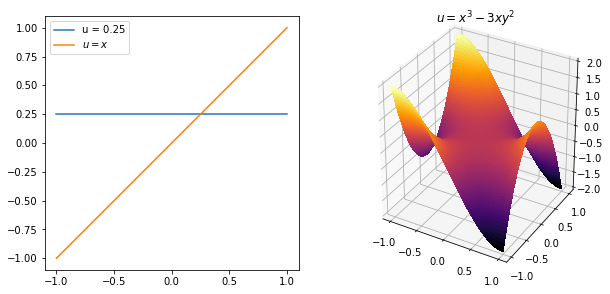

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = np.linspace(-1, 1, 101)
X, Y = np.meshgrid(x, x)

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

ax1.plot(x, [0.25]*len(x), label=r'u = 0.25')
ax1.plot(x, x, label=r'$u = x$')
# ax2.imshow(X**3 - 3*X*Y**2, cmap='inferno', extent=[min(x), max(x), min(x), max(x)])
ax2.plot_surface(X, Y, X**3 - 3*X*Y**2, rstride=1, cstride=1, cmap='inferno', antialiased=False)

ax2.set_title(r'$u=x^3 - 3xy^2$')
ax1.legend(loc='best')
ax1.set_aspect('equal')
plt.show()

Looking at the surface plot on the right, it almost looks like there is something like symmetry going on. For every "extremity" going up, we have an identical one opposite of it, but going down, as if to cancel each other out. It turns out that that is exactly what happens. We can see this on the 1-D case as well, where we have 

$$ u(0) = \frac{u(x) + u(-x)}{2}. $$

Tristan Needham explains this in a more general case (although we could generalise this further to a sphere) very nicely in his book Visual Complex Analysis:

> The Laplacian of $u$ at a point $p$ measures the amount by which the average value of $u$ on an infinitesimal circle centered at $p$ exceeds the value of $u$ at $p$ itself. More precisely, if $r$ is the infinitesimal radius of this circle, then $$ \overline{u} - u(p) = \frac{1}{4}r^2 \Delta u $$

In our case, where $\Delta u = 0$, this means that the value of $u$ at some point $p$ is equal to the mean of the infinitesimal circle around $p$. Actually, if $u$ is a harmonic function this is true for a circle of any radius. 

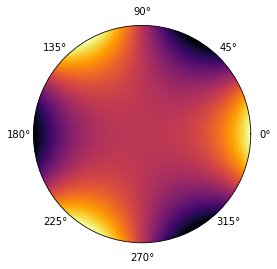

mean(u) - u(0,0) =  7.013888888888634e-13


In [2]:
def f_polar(r, theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x**3 - 3*x*y**2


r = np.linspace(0, 0.001, 101)
theta = np.linspace(0, 2*np.pi, 360)
rr, tt = np.meshgrid(r, theta)

u = f_polar(rr, tt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

ax.pcolormesh(tt, rr, u, cmap='inferno')

ax.set_aspect('equal')
ax.set_rgrids([])
plt.show()

print('mean(u) - u(0,0) = ', np.mean(u) - f_polar(0, 0))

We can easily check this for our example $u = x^3 - 3xy^2$, where the mean value in a circle of radius $R$ centered at $(0, 0)$ is given by

$$ \begin{aligned}
\overline{u} &= \frac{1}{2R \ 2 \pi} \int_{-R}^R \int_0^{2 \pi} u \ d \theta d r \\
&= \frac{1}{4R \pi} \int_{-R}^R \int_0^{2 \pi} r^3 (\cos^3 \theta - 3 \cos \theta \sin^2 \theta) \ d \theta dr \\
&= \frac{1}{4R \pi} \int_{-R}^R r^3 \underbrace{\int_0^{2 \pi} (\cos^3 \theta - 3 \cos \theta \sin^2 \theta) \ d \theta}_{= 0} dr = 0
\end{aligned} $$

So the mean value in the circle is zero and $u(0, 0)$ is zero as well, as we expected.

---
Let us think again about the surface given by a set of points $(x, y, u)$ but this time consider a function $u$ such that $\nabla^2 u \neq 0$. For example:

$$ u(r) = \frac{\sin r}{r}, \qquad r = \sqrt{x^2 + y^2} $$

for which

$$ \nabla^2 u = \frac{(1 - r^2) \sin r}{r^3} - \frac{\cos r}{r^2} $$

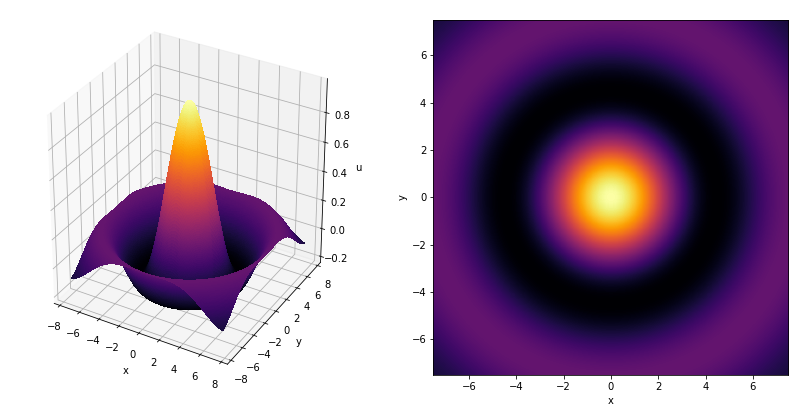

In [6]:
x = np.linspace(-7.5, 7.5, 300)
X, Y = np.meshgrid(x, x)
r = np.sqrt(X**2 + Y**2)

u = np.sin(r)/r

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='inferno', antialiased=False)
ax2.imshow(u, extent=[min(x), max(x), min(x), max(x)], cmap='inferno')

ax1.set_zlabel('u')
for ax in (ax1, ax2):
    ax.set_xlabel('x')
    ax.set_ylabel('y')

ax2.set_aspect('equal')
plt.show()

We know that on the graph of a function the second derivative is related to the curvature of the graph. In fact, the mean curvature $\kappa$ of a 3-D surface can be expressed as the divergence of unit normal vectors to the surface \\( \hat{n} \\):

$$ \kappa = \nabla \cdot \hat{n} $$

which is a very interesting result! So the curvature is the sum of curvature in one direction + curvature in another direction. We also know that we can express unit normal to the surface as a gradient of a function that gives that surface. This way we recover the Laplacian and its relation to curvature.

Let us show these vectors $\nabla u$ overlain on top of $\Delta u$.

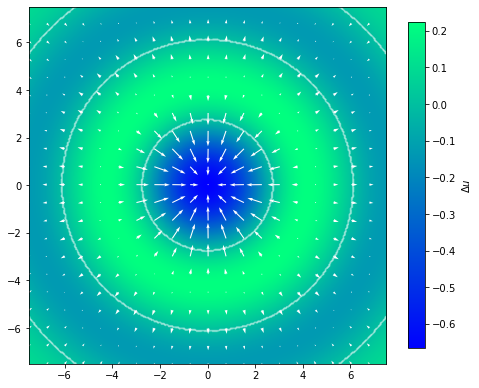

In [4]:
u_x = X*np.cos(r) / r**2 - X*np.sin(r) / r**3  # x-component of grad u
u_y = Y*np.cos(r) / r**2 - Y*np.sin(r) / r**3  # y-component of grad u
lapl_u = (1 - r**2) * np.sin(r) / r**3 - np.cos(r) / r**2  # laplacian u

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

im = ax.imshow(lapl_u, extent=[min(x), max(x), min(x), max(x)], cmap='winter')
ax.quiver(X[::15, ::15], Y[::15, ::15], u_x[::15, ::15], u_y[::15, ::15], color='white', scale=10, units='width')
ax.contour(np.sign(lapl_u), 2, colors='white', extent=[min(x), max(x), min(x), max(x)], alpha=0.3)

plt.colorbar(im, shrink=0.75, label=r'$\Delta u$')
plt.show()

Remember that a Laplacian is divergence of a gradient. This makes sense when we look at the figure above, where blues are negative divergence and greens are positive divergence, i.e. Laplacian. So in the areas of positive divergence we have $\nabla u$ diverging and in negative divergence areas we have $\nabla u$ converging. We can easily see by comparison with previous figures that these areas correspond to convex and concave parts of $u$, with the white contours showing $\Delta u = 0$.